In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
# Load training and testing data from CSV files
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Digit recog/Dataset/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Digit recog/Dataset/test.csv')

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
# Separate features (X) and labels (y) for training data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255

# One-hot encode the target labels for training data
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
# extract features (no labels)
X_test = test_data.values
X_test = X_test.astype('float32') / 255

In [ ]:
#Build the CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
525/525 [==============================] - 32s 61ms/step - loss: 0.1234 - accuracy: 0.9632 - val_loss: 0.0584 - val_accuracy: 0.9810
Epoch 2/2
525/525 [==============================] - 34s 65ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0455 - val_accuracy: 0.9861


In [ ]:
#Evaluate the Model
predictions = model.predict(X_test.reshape(-1, 28, 28, 1))

875/875 [==============================] - 10s 11ms/step


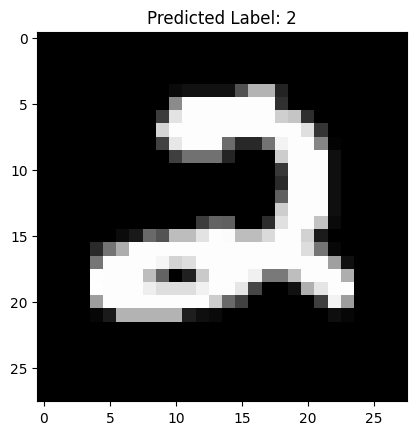

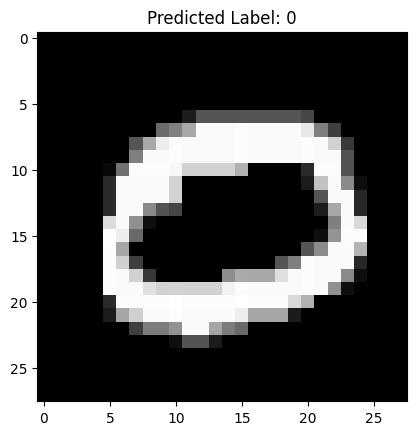

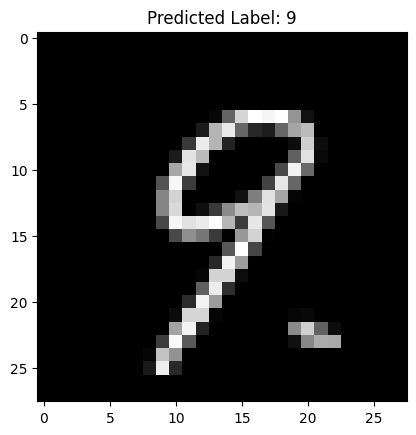

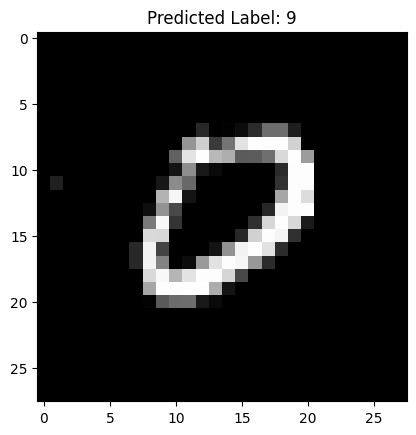

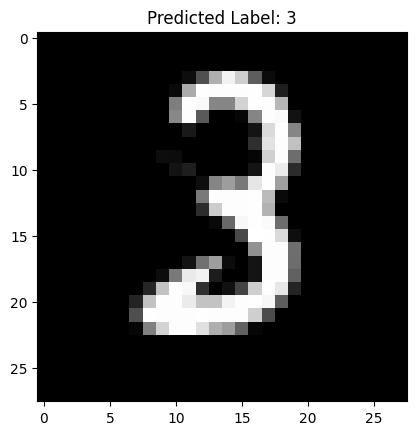

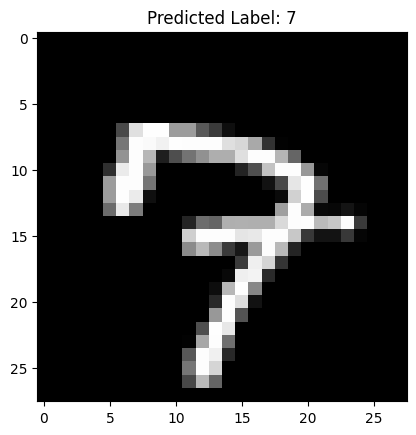

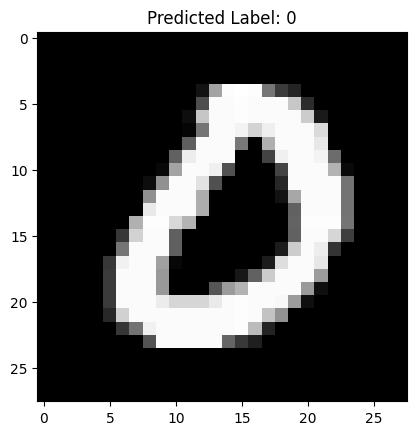

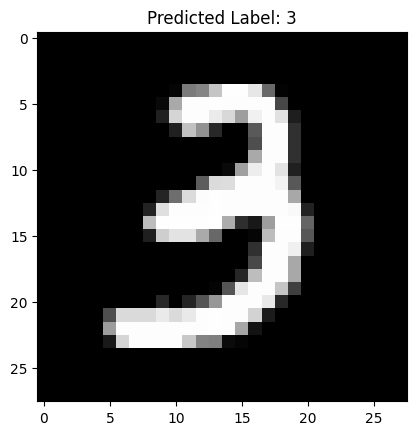

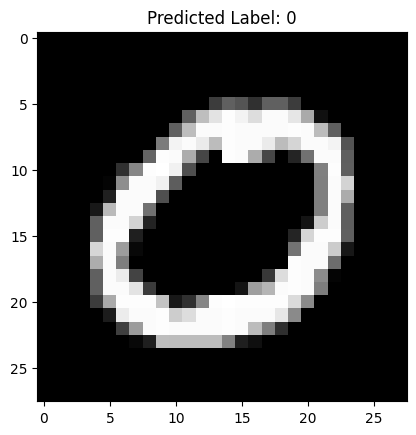

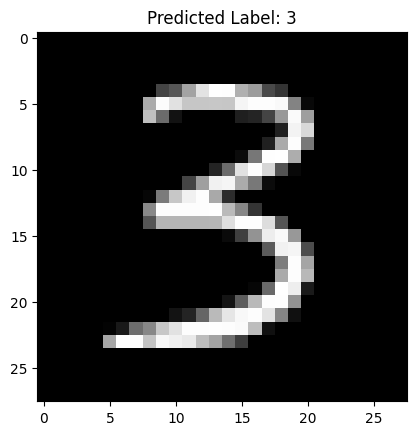

In [ ]:
# Display a few sample predictions with their true labels
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()